# The main purpose of this project was to leverage KNN machine learning model to best classify the customers in a shopping mall

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

# Importing the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# EDA

<Axes: xlabel='Gender', ylabel='count'>

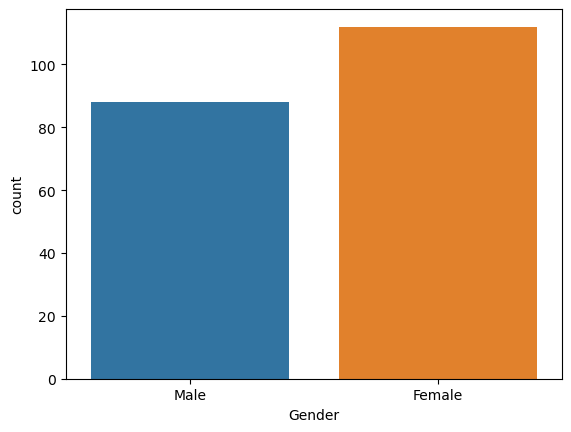

In [8]:
sns.countplot(x=df['Gender'])

<Figure size 800x600 with 0 Axes>

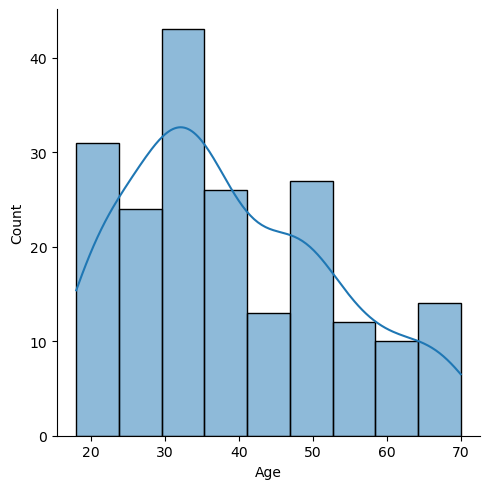

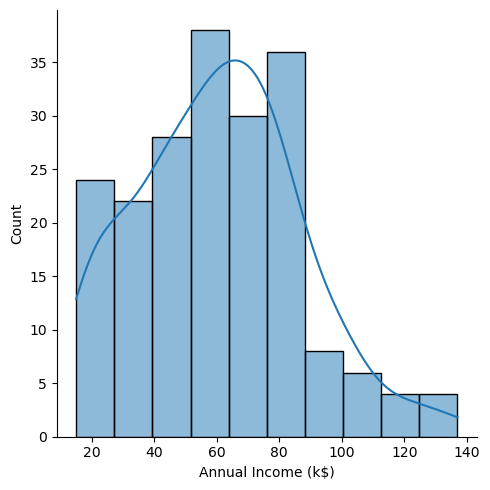

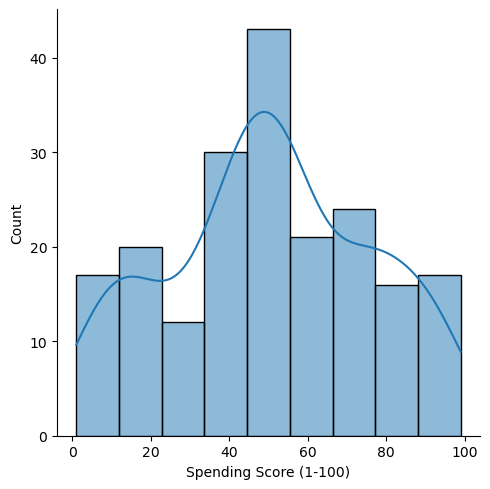

In [9]:
plt.figure(figsize=(8,6))
sns.displot(x=df['Age'], kde=True)
sns.displot(x=df['Annual Income (k$)'], kde=True)
sns.displot(x=df['Spending Score (1-100)'], kde=True)

# Correlation Matrix

/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_14484/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

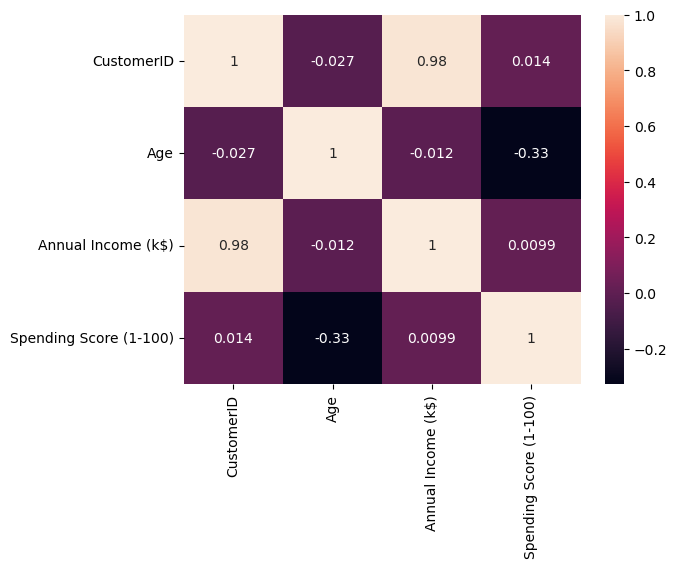

In [10]:
sns.heatmap(df.corr(), annot=True)

# Clustering on 2 features

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


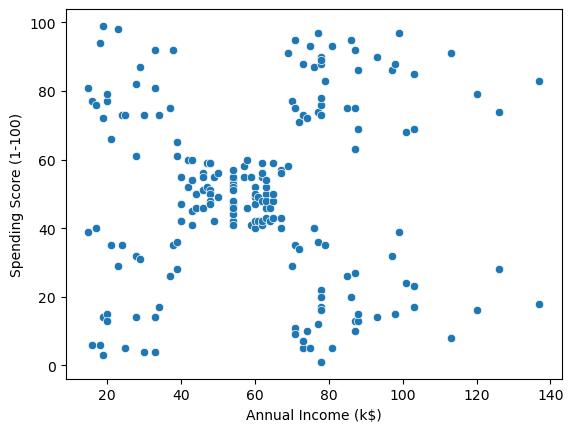

In [13]:
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.show()

In [14]:
from sklearn.cluster import KMeans

errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajee

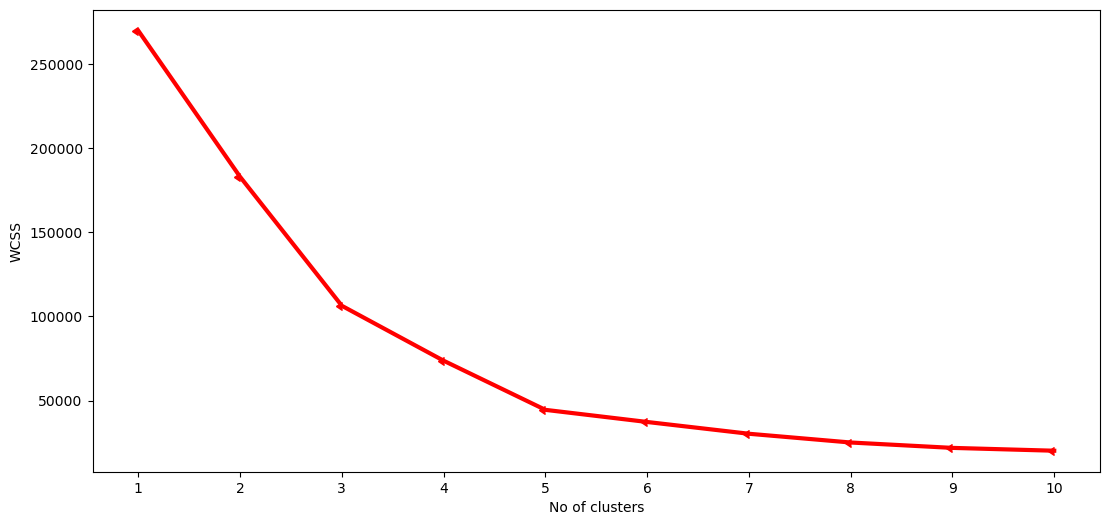

In [15]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors, linewidth=3, color='red', marker=8)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [16]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(df1)
pred = Kmeans.predict(df1)
df1['Label'] = pred
df1.head()

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_14484/1094491030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Label'] = pred


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

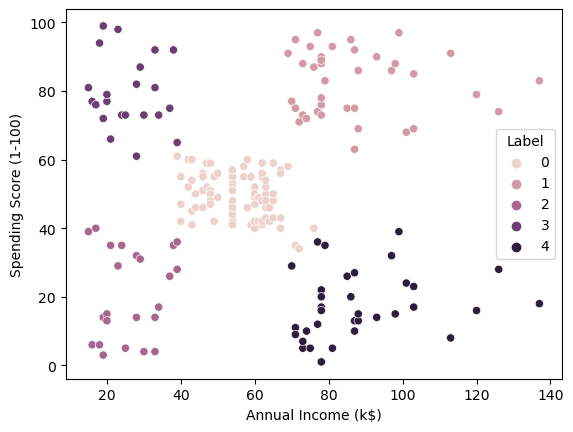

In [17]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label')

# Clustering on 3 features

In [18]:
df2 = df[['Annual Income (k$)','Spending Score (1-100)', 'Age']]

In [19]:
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [20]:
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rajee

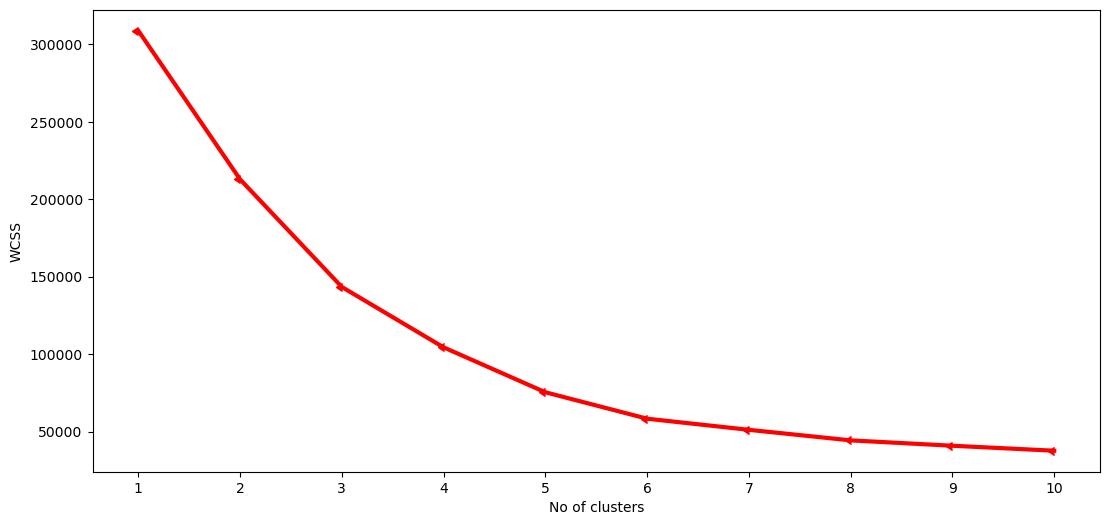

In [21]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors, linewidth=3, color='red', marker=8)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [22]:
Km = KMeans(n_clusters=5)
Km.fit(df2)
predict = Km.predict(df2)
df2['Label'] = predict
df2.head()

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/qq/8k633c556yb1r1jk167bnvfw0000gn/T/ipykernel_14484/1568847974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label'] = predict


,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,4
1,15,81,21,1
2,16,6,20,4
3,16,77,23,1
4,17,40,31,4


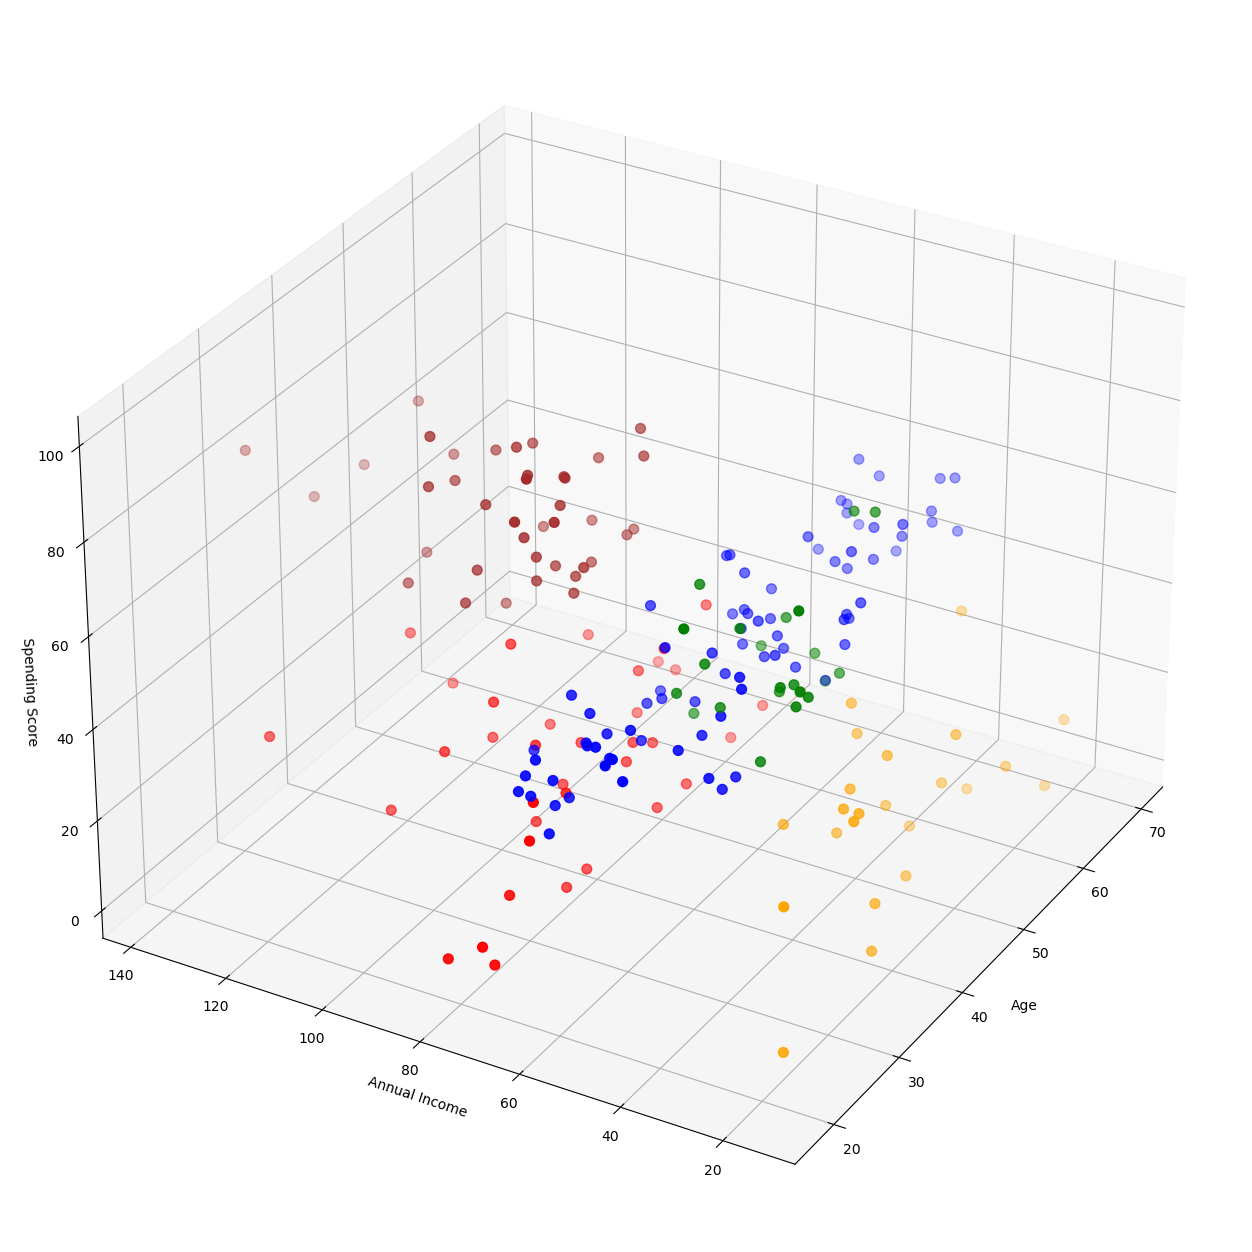

In [23]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], 
           df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)

ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], 
           df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)

ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], 
           df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)

ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3],
           df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)

ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], 
           df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)

ax.view_init(30, 210)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.show()